# Solve NQueens by Genetic Algorithm

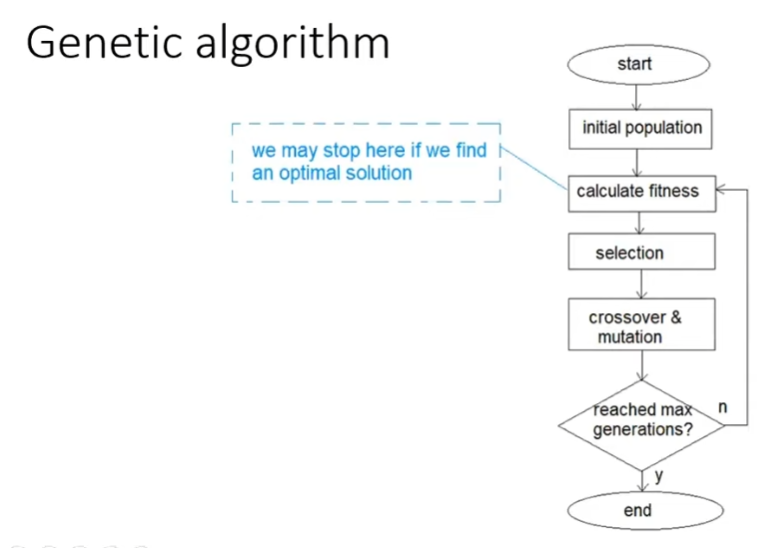

In [1]:
import numpy as np

In [2]:
def init_pop(Nqueens,pop_size):
    return np.random.randint(Nqueens,size=(pop_size,Nqueens))

In [3]:
def calc_fitness(Nqueens,population):
    fitness_vals = []
    for x in population:
        penalty = 0
        for i in range(Nqueens):
            r = x[i]
            for j in range(Nqueens):
                if i == j:
                    continue
                d = abs(i-j)
                if x[j] in [r,r-d,r+d]:
                    penalty+=1
        fitness_vals.append(penalty)
    return -1 * np.array(fitness_vals)

In [4]:
def selection(population, fitness_vals):

    probs = fitness_vals.copy()
    probs += abs(probs.min()) + 1
    probs = probs/probs.sum()
    N = len(population)
    indices = np.arange(N)
    selected_indices = np.random.choice(indices, size=N, p=probs)
    selected_population = population[selected_indices]
    return selected_population

**Crossover**

In [5]:
def crossover(Nqueens,parent1, parent2, pc):
    r = np.random.random() # random.random() htrg3 0<value<1
    if r < pc:
        m = np.random.randint(1,Nqueens) # 3aml mn 1 l7d 7 3shan tt2sm f3ln lakn lw 3mlt mn zero wlw tl3t zero f ana kda m2smtsh
        child1 = np.concatenate([parent1[:m],parent2[m:]])
        child2 = np.concatenate([parent2[:m],parent1[m:]])
    else:
        child1 = parent1.copy()
        child2 = parent2.copy()
    return child1, child2

- Test Crossover Function

In [6]:
# parent1 = selected_population[0]
# parent2 = selected_population[1]
# child1, child2 = crossover(parent1, parent2, pc=0.70)

# print(parent1, '-->', child1)
# print(parent2, '-->', child2)
# "leh katbha marten ?" -> w7da parent1 w w7da parent2


**Mutation**

In [7]:
def mutation(Nqueens,individual, pm): 
    r = np.random.random()
    if r < pm:
        m = np.random.randint(Nqueens)
        individual[m] = np.random.randint(Nqueens)
    return individual

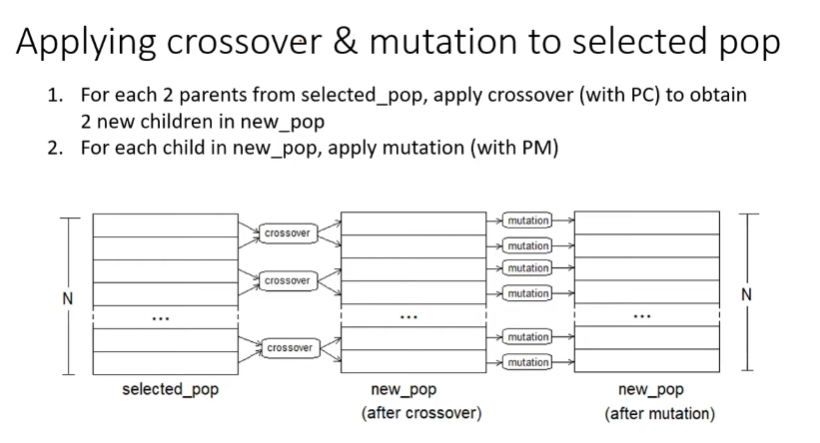

3yzeen b2a n3ml corssover m3 mutation

In [8]:
def crossover_mutation(Nqueens,selected_pop, pc, pm):
    N = len(selected_pop)
    new_pop =np.empty((N,Nqueens), dtype=int)
    
    for i in range(0,N,2):
        parent1 = selected_pop[i]
        parent2 = selected_pop[i+1]
        child1, child2 = crossover(Nqueens,parent1,parent2,pc)
        new_pop[i] = child1
        new_pop[i+1] = child2
    
    for i in range(N):
        mutation(Nqueens,new_pop[i], pm)
    
    return new_pop

In [12]:
def N_Queens(Nqueens,pop_size, max_generations, pc=0.7, pm=0.01):
    population = init_pop(Nqueens,pop_size)
    best_fitness_overall = None
    for i_gen in range(max_generations):
        fitness_vals = calc_fitness(Nqueens,population)
        best_i = fitness_vals.argmax()
        best_fitness = fitness_vals[best_i]
        
        if best_fitness_overall is None or best_fitness>best_fitness_overall:
            best_fitness_overall = best_fitness
            best_solution = population[best_i]

        # \r de gamda btms7 al2deem wbtktb aldgeed by3ml override y3ny 3la altb3
        print(f'\rith_gen = {i_gen:06} Attack={-best_fitness_overall:03}', end='')
        
        if best_fitness==0:
            print('\nFound Optimal Solution')
            break
    
        selected_pop = selection(population,fitness_vals)
        population = crossover_mutation(Nqueens,selected_pop,pc,pm)

    print()
    print(best_solution)
    return best_solution


In [13]:
# Nqueens = int(input("Enter Even Number Of Queens: "))
Nqueens = 10
b_sol = N_Queens(Nqueens,pop_size=3000,max_generations=10000, pc=0.7, pm=0.03)

for i in range(Nqueens):
    for j in range(Nqueens):
        if b_sol[j] == i:
            print('Q',end=" ")
        else:
            print('.',end=" ")
    print()

i_gen = 000572 Attack=002